<a href="https://colab.research.google.com/github/almeidaferreiraisabela/datascience/blob/main/MVP_Sprint_Machine_Learning_e_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Definição do Problema**

O dataset que será utilizado neste projeto é o Netflix Userbase Dataset, que é uma amostra da base de usuários da Netflix, que apresenta diversos aspectos sobre a assinatura e o consumidor da plataforma.
Cada linha representa um usuário único, identificado por seu ID. O conjunto de dados inclui informações como o tipo de assinatura do usuário (Básico, Padrão ou Premium), a receita mensal gerada pela assinatura, a data em que ingressou na Netflix (Data de adesão), a data do último pagamento e o país em que estão localizados entre outros dados.


 Para mais detalhes sobre este dataset, consulte: https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset/data

**Informações sobre os atributos:**

User ID - ID do usuário

Subscription Type - Tipo de assinatura (Básico, Padrão ou Premium)

Monthly Revenue - Receita Mensal gerada pelo usuário (USD)

Join Date - Data de adesão da plataforma

Last Payment Date - Data do último pagamento

Country - País no qual o usuário informa

Age - Idade do usuário

Gender - Gênero do usuário (Feminino e Masculino)

Device - O dispositivo usado para acessar a plataforma (Smart TV, Laptop, entre
outros)

Plan Duration - Tempo de duração do plano


**Objetivo:**

O objetivo é construir modelos de machine learning que possam prever o tipo de assinatura de um usuário com base em suas características individuais. Isso pode ajudar a empresa a entender melhor seu público-alvo, a personalizar estratégias de marketing e retenção de clientes, além de auxiliar no orçamento e forecast.

**Estratégia de modelagem:**

Será utilizada uma abordagem de aprendizado supervisionado, pois temos acesso aos rótulos em nosso conjunto de dados.

Como se trata de um problema de classificação, será utilizado o algoritmo "RandomForestClassifier", uma vez que ele se apresenta como um algoritmo de aprendizado de máquina muito versátil e que geralmente funciona bem para uma variedade de problemas de classificação.

Dessa forma, será necessário realizar a codificação de variáveis categóricas, como país, gênero e dispositivo, para que possam ser utilizadas nos modelos.

Por fim, a avaliação dos modelos será feita utilizando métricas de desempenho adequadas para problemas de classificação, como acurácia, precisão, recall e F1-score. Além disso, será utilizada a validação cruzada, uma vez que ela ajuda a garantir que o modelo seja avaliado de forma robusta e generalizável, evitando overfitting nos dados de treinamento.



# **2. Carga de Dados e Análise Exploratória**

Primeiramente, foram importados os pacotes necessários por meio do comando *import*.

Em seguida, foi importado o arquivo em csv online.

Após isso, inicia-se uma análise exploratória dos dados.

Por fim, o conjunto de dados foi separado em conjuntos de treino e teste.

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd

# Importa o arquivo CSV pela URL de importação
url = "https://raw.githubusercontent.com/almeidaferreiraisabela/datascience/main/Netflix%20Userbase.csv"

# Identifica as colunas
colunas = ['user id','subscription type','monthly revenue','join date','last payment date','country','age','gender','device','plan duration']

# Lê o arquivo pelas as colunas informadas na linha acima
dataset = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')

dataset.head()

,user id,subscription type,monthly revenue,join date,last payment date,country,age,gender,device,plan duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [ ]:
#Estatísticas descritivas
# Mostra a quantidade de linhas e colunas do dataset
print(dataset.shape)

(2500, 10)


In [ ]:
# Mostra as informações do dataset
# Esse passo é importante para entender a estrutura do conjunto de dados, qual tipo de dado em cada coluna e se há missings na tabela
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user id            2500 non-null   int64 
 1   subscription type  2500 non-null   object
 2   monthly revenue    2500 non-null   int64 
 3   join date          2500 non-null   object
 4   last payment date  2500 non-null   object
 5   country            2500 non-null   object
 6   age                2500 non-null   int64 
 7   gender             2500 non-null   object
 8   device             2500 non-null   object
 9   plan duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB
None


In [ ]:
# Verifica o formato de dataset de cada atributo
dataset.dtypes

user id               int64
subscription type    object
monthly revenue       int64
join date            object
last payment date    object
country              object
age                   int64
gender               object
device               object
plan duration        object
dtype: object

In [ ]:
# Quadro resumo  das estatísticas do dataset (contagem, média, desvio padrão, mínimo, máximo e os quartis)
#lembrando que aplica-se apenas para as variáveis numéricas, as demais (object), não entram nessas estatíticas
dataset.describe()

,user id,monthly revenue,age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [ ]:
# Contagem dos valores da coluna "subscription type"
contagem = dataset['subscription type'].value_counts()
print(contagem)

subscription type
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64


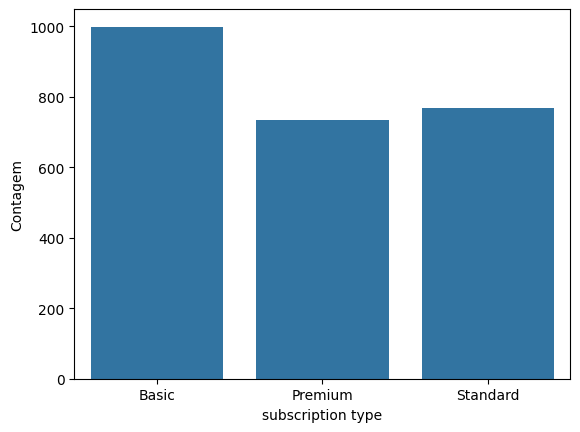

In [ ]:
# Plotar o gráfico de barras da coluna "subscription type"
sns.countplot(data=dataset, x='subscription type')
plt.ylabel('Contagem')
plt.show()

In [ ]:
# Substituir espaços em branco por valores nulos
dataset.replace(r'^\s*$', pd.NA, regex=True, inplace=True)

# Verificar se há valores ausentes em todas as colunas, incluindo valores em branco
valores_ausentes = dataset.isna().any()

# Imprimir os resultados
print(valores_ausentes)

user id              False
subscription type    False
monthly revenue      False
join date            False
last payment date    False
country              False
age                  False
gender               False
device               False
plan duration        False
dtype: bool


In [ ]:
# Separando as features (variáveis independentes) e o target (variável dependente)
X = dataset.drop('subscription type', axis=1)  # Features
y = dataset['subscription type']  # Target

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# test_size: proporção do conjunto de teste (20% neste exemplo)
# random_state: seed para garantir a reprodutibilidade dos resultados

In [ ]:
#Visualizando a divisão dos dados

print("### Train: ###")
print(X_train.info())
print(y_train.info())

print("### Test: ###")
print(X_test.info())
print(y_test.info())


### Train: ###
<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 2055 to 860
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user id            2000 non-null   int64 
 1   monthly revenue    2000 non-null   int64 
 2   join date          2000 non-null   object
 3   last payment date  2000 non-null   object
 4   country            2000 non-null   object
 5   age                2000 non-null   int64 
 6   gender             2000 non-null   object
 7   device             2000 non-null   object
 8   plan duration      2000 non-null   object
dtypes: int64(3), object(6)
memory usage: 156.2+ KB
None
<class 'pandas.core.series.Series'>
Index: 2000 entries, 2055 to 860
Series name: subscription type
Non-Null Count  Dtype 
--------------  ----- 
2000 non-null   object
dtypes: object(1)
memory usage: 31.2+ KB
None
### Test: ###
<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 1447 to 2213
Data col

# **3. Treinamento e Execução do Modelo**
Iremos seguir o seguinte processo para treinar e executar o modelo:

1- Definição das Variáveis:
Foi definido quais colunas são consideradas categóricas e quais são numéricas em nossa base de dados.

2 - Criação dos Pipelines de Pré-Processamento:
Foi criado dois pipelines de pré-processamento, um para as variáveis categóricas e outro para as numéricas.

3 - Combinação dos Pipelines em um ColumnTransformer:
Foi utilizado o ColumnTransformer para combinar os pipelines de pré-processamento, especificando quais transformações aplicar em quais colunas.

4 - Criação do Pipeline Completo com o Classificador:
Foi criado um pipeline completo que inclui o pré-processamento das features e o classificador RandomForestClassifier.

5 - Definição dos Hiperparâmetros para Otimização:
Foi definido uma grade de hiperparâmetros que serão otimizados usando GridSearchCV.

6 - Aplicação da Otimização de Hiperparâmetros usando GridSearchCV:
Foi aplicado a otimização de hiperparâmetros usando GridSearchCV para encontrar a melhor combinação de hiperparâmetros.

In [ ]:
# Definição das Variáveis
categorical_features = ['country', 'gender', 'device', 'plan duration']
numeric_features = ['monthly revenue', 'age']

# Criação dos Pipelines de Pré-Processamento
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combinando os Pipelines em um ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Criando o pipeline completo com o classificador
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier())])

# Definindo os hiperparâmetros para otimização
param_grid = {
    'classifier__n_estimators': [100, 200, 300],  # Número de árvores na floresta
    'classifier__max_depth': [None, 10, 20],  # Profundidade máxima de cada árvore
}


# Aplicando a otimização de hiperparâmetros usando GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Imprimindo os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:")
print(grid_search.best_params_)

Melhores hiperparâmetros:
{'classifier__max_depth': 10, 'classifier__n_estimators': 200}


Comentários adicionais:

Foram utilizadas operações de transformação como StandardScaler para as features numéricas e OneHotEncoder para as features categóricas.

Não foi feito o processo de feature selection, uma vez que a base de dados possui poucas variáveis. Sendo assim, foi decidido utlizar todas as variáveis para construir o modelo preditivo.

Os hiperparâmetros foram otmizados usando GridSearchCV, ajustando o número de estimadores e a profundidade máxima da árvore. Isso é importante para melhorar a performance do modelo e evitar overfitting ou underfitting.

Outros métodos podem ser utilizados futuramente como o "GradientBoostingClassifier", o "XGBoost", ou até mesmo redes neurais, para analisar este e outros problemas da base de dados.

Além disso, um comitê de modelos diferentes pode ser criado utilizando técnicas de ensemble como VotingClassifier, BaggingClassifier, ou AdaBoostClassifier com o intuito de combinar múltiplos modelos e melhorar o desempenho geral.

# **4. Avaliação do Modelo**

Para avaliar o modelo foi utilizada a metodologia de validação cruzada, especificamente o modelo de validação cruzada k-fold.

Foram utilizadas métricas como precisão, recall e F1-score para avaliar o desempenho do modelo. Essas métricas são comumente usadas em problemas de classificação e fornecem uma visão abrangente do desempenho do modelo em diferentes aspectos.

In [ ]:
# Calculando as previsões durante a validação cruzada
cv_predictions = cross_val_predict(grid_search.best_estimator_, X_train, y_train, cv=5)

# Calculando as métricas
accuracy =  accuracy_score(y_train, cv_predictions)
precision = precision_score(y_train, cv_predictions, average='macro')
recall = recall_score(y_train, cv_predictions, average='macro')
f1 = f1_score(y_train, cv_predictions, average='macro')
conf_matrix = confusion_matrix(y_train, cv_predictions)

# Imprimindo os resultados
print("Accuracy na base de treino:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy na base de treino: 0.6365
Precision: 0.656569266907475
Recall: 0.6173864538401687
F1 Score: 0.6240432094714171


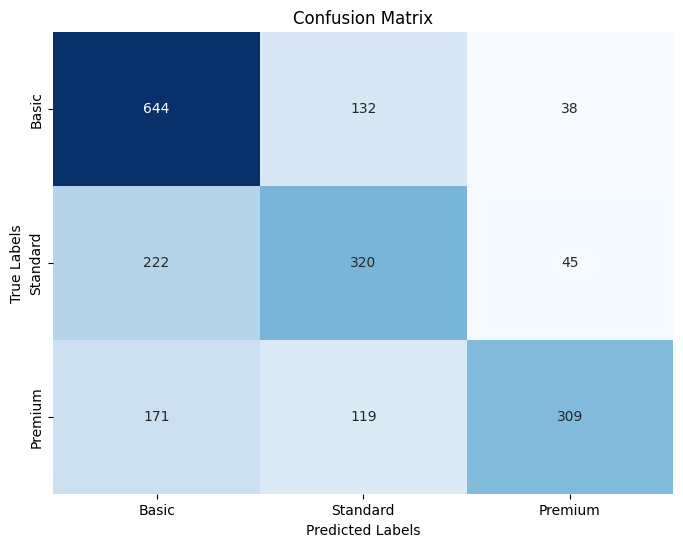

In [ ]:
# Definindo os rótulos das classes
classes = ['Basic', 'Standard', 'Premium']

# Calculando a matriz de confusão
conf_matrix = confusion_matrix(y_train, cv_predictions)

# Plotando a matriz de confusão como um mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=classes)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=classes)
plt.show()

#print("Matriz de Confusão:\n", conf_matrix)



# **4. Teste do modelo**

Iremos exportar o modelo treinado.

Em seguida, carregaremos o modelo para fazer previsões no conjunto de dados de teste.

Por fim, o desempenho do modelo é calculado comparando as previsões com os rótulos verdadeiros do conjunto de teste.

Sim, é uma boa prática usar validação cruzada para avaliar o desempenho do modelo, especialmente se o conjunto de dados não for muito grande. A validação cruzada ajuda a garantir que o modelo seja avaliado de forma robusta e generalizável, evitando overfitting nos dados de treinamento.

In [ ]:
# Exportar o modelo treinado
import joblib

# Salvar o modelo treinado em um arquivo
joblib.dump(grid_search.best_estimator_, 'modelo_treinado.pkl')

# Carregar o modelo treinado
modelo_carregado = joblib.load('modelo_treinado.pkl')

# Fazer previsões no conjunto de teste
previsoes_teste = modelo_carregado.predict(X_test)

# Avaliar o desempenho do modelo no conjunto de teste
acuracia_teste = accuracy_score(y_test, previsoes_teste)
print(f'Accuracy do modelo nos dados de teste: {acuracia_teste}')

# Outras métricas de avaliação, se necessário
precisao_teste = precision_score(y_test, previsoes_teste, average='macro')
revocacao_teste = recall_score(y_test, previsoes_teste, average='macro')
f1_teste = f1_score(y_test, previsoes_teste, average='macro')
matriz_confusao_teste = confusion_matrix(y_test, previsoes_teste)

# Imprimir as métricas de avaliação
print(f'Precision do modelo nos dados de teste: {precisao_teste}')
print(f'Recall do modelo nos dados de teste: {revocacao_teste}')
print(f'F1 Score do modelo nos dados de teste: {f1_teste}')
#print('Matriz de Confusão nos dados de teste:')
#print(matriz_confusao_teste)


Accuracy do modelo nos dados de teste: 0.632
Precision do modelo nos dados de teste: 0.668636466080685
Recall do modelo nos dados de teste: 0.6235065250871363
F1 Score do modelo nos dados de teste: 0.6252354534499172


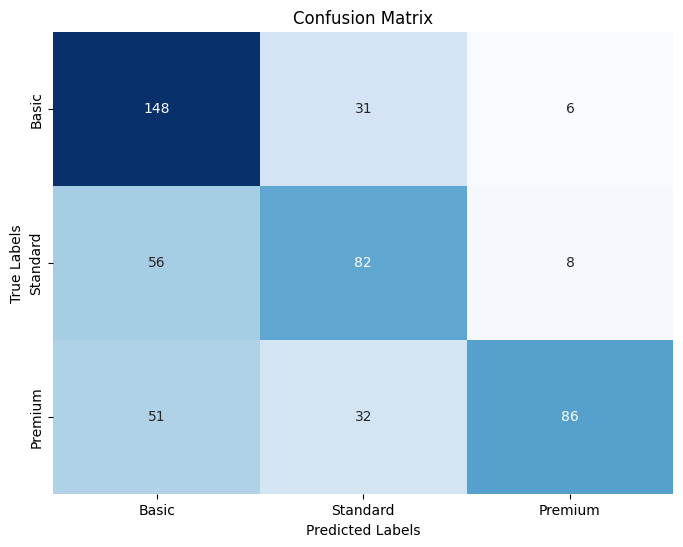

In [ ]:
# Plotar a matriz de confusão como um mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_teste, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=np.arange(len(classes)) + 0.5, labels=classes)
plt.yticks(ticks=np.arange(len(classes)) + 0.5, labels=classes)
plt.show()

Comentário adicionais:

As metricas de avaliação não possuem um desvio significativo entre a utliziação do modelo na base de treinamento e na base de teste. Sendo assim, não foi observado um problema de underfitting nem como de overfitting.  
